# Ken Woon's Notebook

In [1]:
#Import required libraries
import project_functions2 as pf
import seaborn as sns

## Exploratory Data Analysis

Research question being explored:
- At what times and years do the crimes occur the most?

### 1. Understanding the Variables

The dataset for this project is the historical crime data in Vancouver. In order to open the file and start with the analysis, the libraries required are needed to be imported first, which is done below. The CSV file is then read using `pandas` into a variable called `df`.

In [2]:
#Load data
df = pf.load('../data/raw/crimedata_csv_all_years.csv')

In [3]:
#Display first 5 rows of the dataset
pf.head(df)

,Type,Year,Month,Day,Hour,Minute,Hundred Block,Neighbourhood,X,Y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


`.head()` returns the first 5 rows of the dataset. It can be seen that there are 10 columns which are the type of crime, the year, month, day, hour, minute, hundred block, neighbourhood, and the x and y coordinates. It is not certain that these are all the existing columns, thus it will be confirmed right after. From what can be seen, the table only shows `Theft from Vehicle` in the same hundred block, neighbourhood, and x and y coordinates, but at different times. It is not likely for the entire dataset to contain only this type of crime at this location, and will be checked in the analysis section.

In [4]:
#Display number of rows and columns
pf.shape(df)

(793771, 10)
The number of rows is 793771 and the number of columns is 10


`.shape` returns the number of rows by the number of columns of the dataset. The output was `(793916, 10)`, meaning that there are 793916 rows and 10 columns in total.

In [5]:
#Display the name of the columns
pf.col(df)

Index(['Type', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Hundred Block',
       'Neighbourhood', 'X', 'Y'],
      dtype='object')


`.col` returns the name of all the columns in the dataset. It is confirmed that the table displayed earlier shows all the 10 existing columns with the same name as the ones in this list.

The next step would be to better understand the values for each variable. `.nunique()` will be used to return the number of unique values for each column. By specifying the column axis, `axis = 0` in this case, the method will search column-wise and return the number of unique values for each row.

In [6]:
#Display number of unique values for each variable
pf.nunique(df)

Type                 11
Year                 19
Month                12
Day                  31
Hour                 24
Minute               60
Hundred Block     22869
Neighbourhood        24
X                139448
Y                139287
dtype: int64


It can be seen that there are indeed other types of crimes other than `Theft from Vehicle` as there are more than 1 type. There are 19 years spanned by the data, however, it is not known what the starting and ending year is at the moment. There also seems to be a wide range of areas covered from looking at the number of hundred blocks and neighbourhood present in the data.

In [7]:
#Display summary of numerical variables
pf.numerical(df)

,Year,Month,Day,Hour,Minute,X,Y
count,793771.000000,793771.000000,793771.000000,793771.000000,793771.000000,793771.000000,793771.000000
mean,2011.190138,6.494175,15.393891,12.398277,15.711058,450214.255541,4991404.598120
std,5.528593,3.417050,8.757594,7.445184,18.302174,137501.623612,1524189.154137
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,7.000000,0.000000,490179.749600,5454243.620100
50%,2011.000000,7.000000,15.000000,14.000000,5.000000,491556.822500,5457160.589300
75%,2016.000000,9.000000,23.000000,19.000000,30.000000,493390.042800,5458717.612400
max,2021.000000,12.000000,31.000000,23.000000,59.000000,498306.000000,5462299.731100


`.numerical()` displays a summary of the count, mean, standard deviation, minimum, 25%, 50%, 75% , and maximum of the values for each numeric variable. The code that follows formats each row and suppresses scientific notation. From this output, it can be deduced that the dataset spans the years 2003 to 2021 with crimes occurring at a mean hour during 12 noon. The other values despite being a good indication for the expectation of each variables, do not give much useful information and thus will be further explored later. The table is also exclusive to numerical variables, meaning that the information about string variables are not provided.

In [8]:
#Display unique values for discrete variables
pf.discrete(df)

['Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle', 'Vehicle Collision or Pedestrian Struck (with ..., 'Vehicle Collision or Pedestrian Struck (with ..., ..., 'Break and Enter Residential/Other', 'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft']
Length: 11
Categories (11, object): ['Break and Enter Commercial', 'Break and Enter Residential/Other', 'Homicide', 'Mischief', ..., 'Theft of Bicycle', 'Theft of Vehicle', 'Vehicle Collision or Pedestrian Struck (with ..., 'Vehicle Collision or Pedestrian Struck (with ...]
['DAVIE ST / HOWE ST', 'DAVIE ST / JERVIS ST', 'DAVIE ST / MAINLAND ST', 'DAVIE ST / MARINASIDE CRES', 'DAVIE ST / NICOLA ST', ..., 'CYPRESS ST / W 44TH AVE', 'CYPRESS ST / W 47TH AVE', 'CYPRESS ST / W 54TH AVE', 'CYPRESS ST / W 57TH AVE', 'CYPRESS ST / W BROADWAY AV']
Length: 22869
Categories (22869, object): ['0K E CORDOVA ST', '1000D BEACH AVE', '1000K CAMBIE ST', '1000MARINASIDE CRES', ..., 'YUKON ST / W 5TH AVE', 'YUKON ST / W 6TH AVE', 'YUKO

`.discrete()` is used on the discrete variables to show each of their unique values in the columns. From the previous results, it is known that there are 11 types of different values for the type of crimes. There are indeed 11 unique strings shown in the block above. Only a handful of the hundred block is printed due to the overwhelming number of 22939 unique values. All the 24 neighbourhood values are displayed alongside as well.

### 2. Cleaning the Dataset

The objective of this section is to clean the dataset in order to avoid any misleading data and to remove unused blocks. The procedure would be to remove redundant variables, make a better variable selection, remove outliers, and removing null value rows.

Although having more information may seem better at first glance, there are times when too much information becomes too distracting. The research question that would be explored further in this analysis is **"At what times and years do the crimes occur the most?"**. In this case, as there would be a heavy emphasis on time and date, and less on location, the variables that contain information about the crime locations become redundant. These include the hundred block, neighbourhood, x, and y columns specifically. All these columns will be removed.

The following step is to remove any columns that have enough null values that may affect the analysis results later. As there are no null values in the data, this dataset cleaning step can be skipped.

Next would be to check for any outlier values. From the `.numerical()` block, it shows that the range of values for month, day, and hour are 1-12, 1-31, and 0-23 respectively. These ranges are as expected for their respective variables, thus there are no outliers to be deleted. Another important factor to consider is the range of datetime covered by each year. As it is required for all the years to cover cases reported from January to December for an equal data distribution, the start and end date for this dataset have to be validated. In order to do this, a new column will be added called 'datetime', and from this column, the maximum and minimum value can be obtained. The output shows that the dataset starts from the beginning of 2003 but stops midway through 2021. For a more equally distributed data, all values from 2021 will be removed.

The last step consists of removing rows with null values, however, it is previously known that there are no existing null values in the dataset, hence no further data altering would be required.

In [9]:
#Process and improve original dataset and assign to new variable
df_cleaned = pf.process(df)

,Type,Year,Month,Day,Hour,Minute,Datetime
370240,Offence Against a Person,2003,1,1,0,0,2003-01-01 00:00:00
438251,Other Theft,2003,1,1,0,0,2003-01-01 00:00:00
370282,Offence Against a Person,2003,1,1,0,0,2003-01-01 00:00:00
368861,Offence Against a Person,2003,1,1,0,0,2003-01-01 00:00:00
373533,Offence Against a Person,2003,1,1,0,0,2003-01-01 00:00:00
...,...,...,...,...,...,...,...
39236,Theft of Bicycle,2020,12,31,22,0,2020-12-31 22:00:00
212466,Break and Enter Residential/Other,2020,12,31,22,30,2020-12-31 22:30:00
281035,Mischief,2020,12,31,22,46,2020-12-31 22:46:00
716545,Theft from Vehicle,2020,12,31,23,0,2020-12-31 23:00:00


This concludes the dataset cleaning stage and the final table can be written into a file which would be placed in the processed dataset folder.

In [10]:
#Write dataset locally to CSV file
pf.write(df_cleaned, '../data/processed/crimedata_datetime.csv')

### 3. Variable Analysis

The variable analysis consists of visualization techniques which would be used throughout this section in order to aid the analysis of the variables.

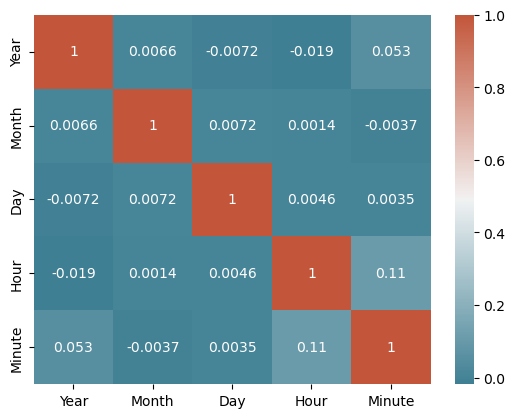

In [11]:
#Create correlation matrix
pf.corr(df_cleaned)

A correlation matrix is useful for picking out any relationship between each variables. The numbers in each box of the graph show the correlation coefficients, which are the numerical representation of how close the two variables are related to each other. The numbers range from 0 up to 1, where 0 signifies no relationship and 1 represents that they are fully dependent on each other. These values can also become negative if there is a negative correlation between them, meaning that an increase of a variable leads to a decrease of the other. The results show that there are barely any correlation between each variable, with a mere maximum coefficient value of 0.11. This means that each column of the dataset do not rely on each other and would be more effective to analyze each variable separately.

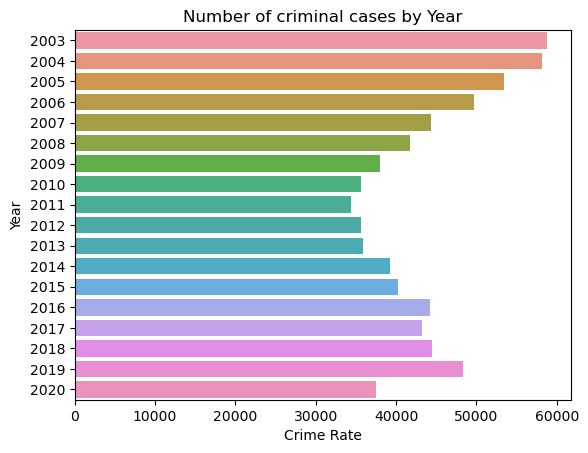

In [12]:
#Create countplot
pf.countplot(df_cleaned, 'Year', 'Number of criminal cases by Year', 'Crime Rate')

Each variable will be plotted using a countplot for the analysis. From the result above, there seem to be a parabolic relationship between the crime rates throughout the years with a few exceptions. 2003 started with the largest crime rate frequency, slowly decreasing until the turning point of 2011, where it began to increase up until 2019. The crime rate in 2020 dropped by a fair amount likely due to the pandemic.

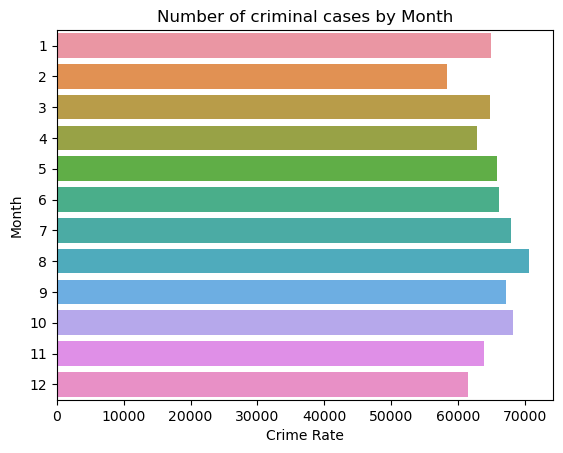

In [13]:
#Create countplot
pf.countplot(df_cleaned, 'Month', 'Number of criminal cases by Month', 'Crime Rate')

The countplot of the relationship between the crime rates and the months shows a fairly linear graph. August had the most frequency while February had the least, however, by only a margin of about 1000 crimes. Not much can be deduced from this other than that the crime rates are equally split between the months in each year, thus the occurrence of crime rates are not likely to depend on the month.

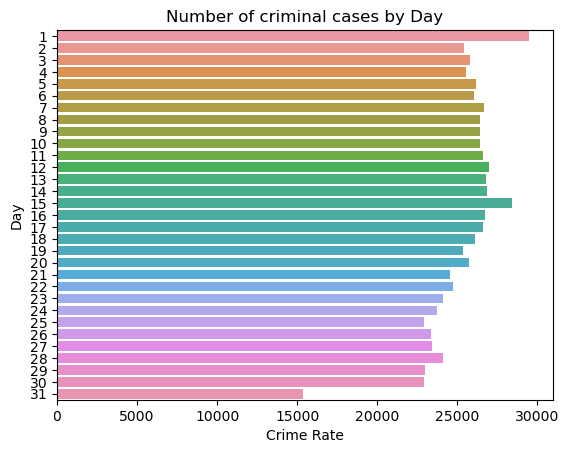

In [14]:
#Create countplot
pf.countplot(df_cleaned, 'Day', 'Number of criminal cases by Day', 'Crime Rate')

From the result of this countplot, it is shown that the most occurrence day of crime is on the 1st, followed by the 15th. At the beginning of each month and exactly midway through the months are when crimes happen the most, with a steady rate in between this duration, and a slight decrease after the 15th. The 31st has significantly less crime rates likely due to the fact that this day exists only in half of the months in each year.

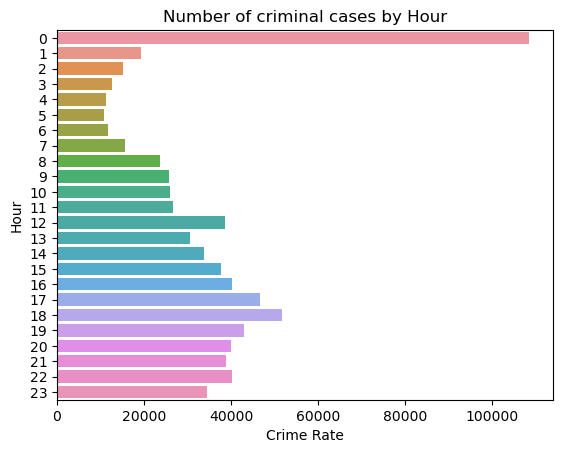

In [15]:
#Create countplot
pf.countplot(df_cleaned, 'Hour', 'Number of criminal cases by Hour', 'Crime Rate')

Criminal cases occur the most frequent at midnight and leads other hours by a large amount. At 6 p.m. is the next frequent hour. There is a trend of criminal cases happening more often during late evening and especially during midnight, however, drops significantly during the early morning.

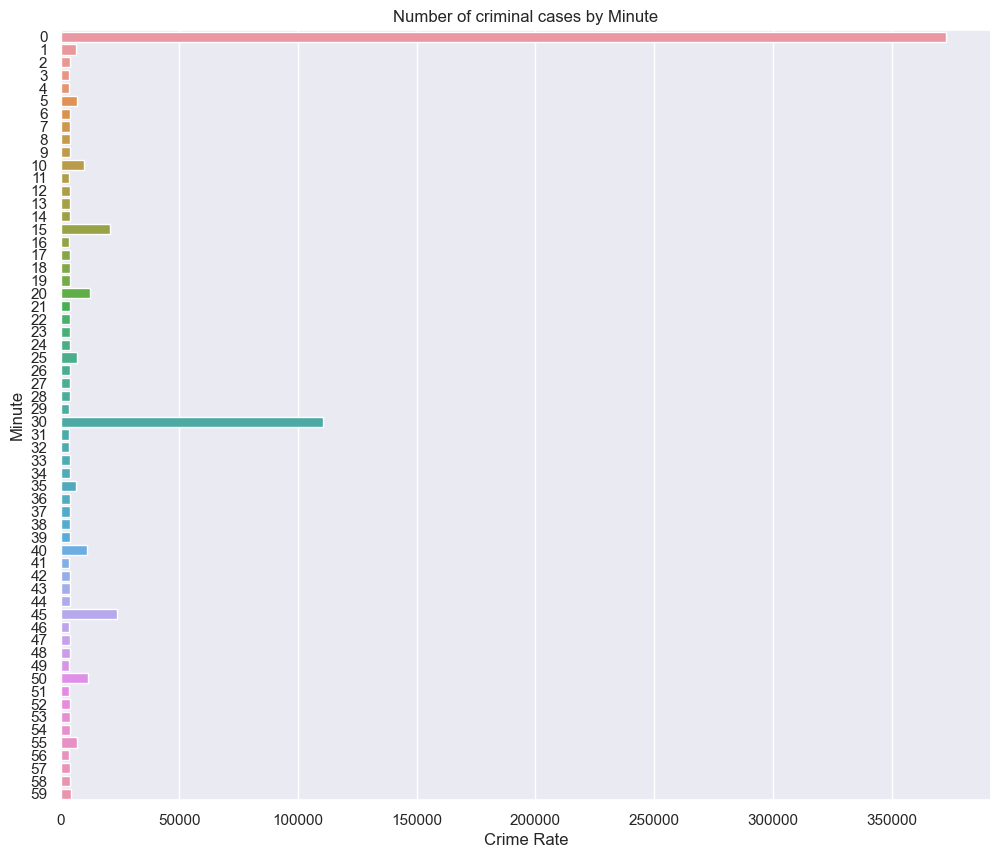

In [21]:
#Create countplot
pf.countplot(df_cleaned, 'Minute', 'Number of criminal cases by Minute', 'Crime Rate')
sns.set(rc = {'figure.figsize':(12,10)})

The occurrence of criminal cases happen the most frequently on the 0th minute followed by the 30th by a far margin. The frequency for the other minutes are very little in comparison. It is likely that most cases have the minutes rounded to the nearest hour or half-hour.

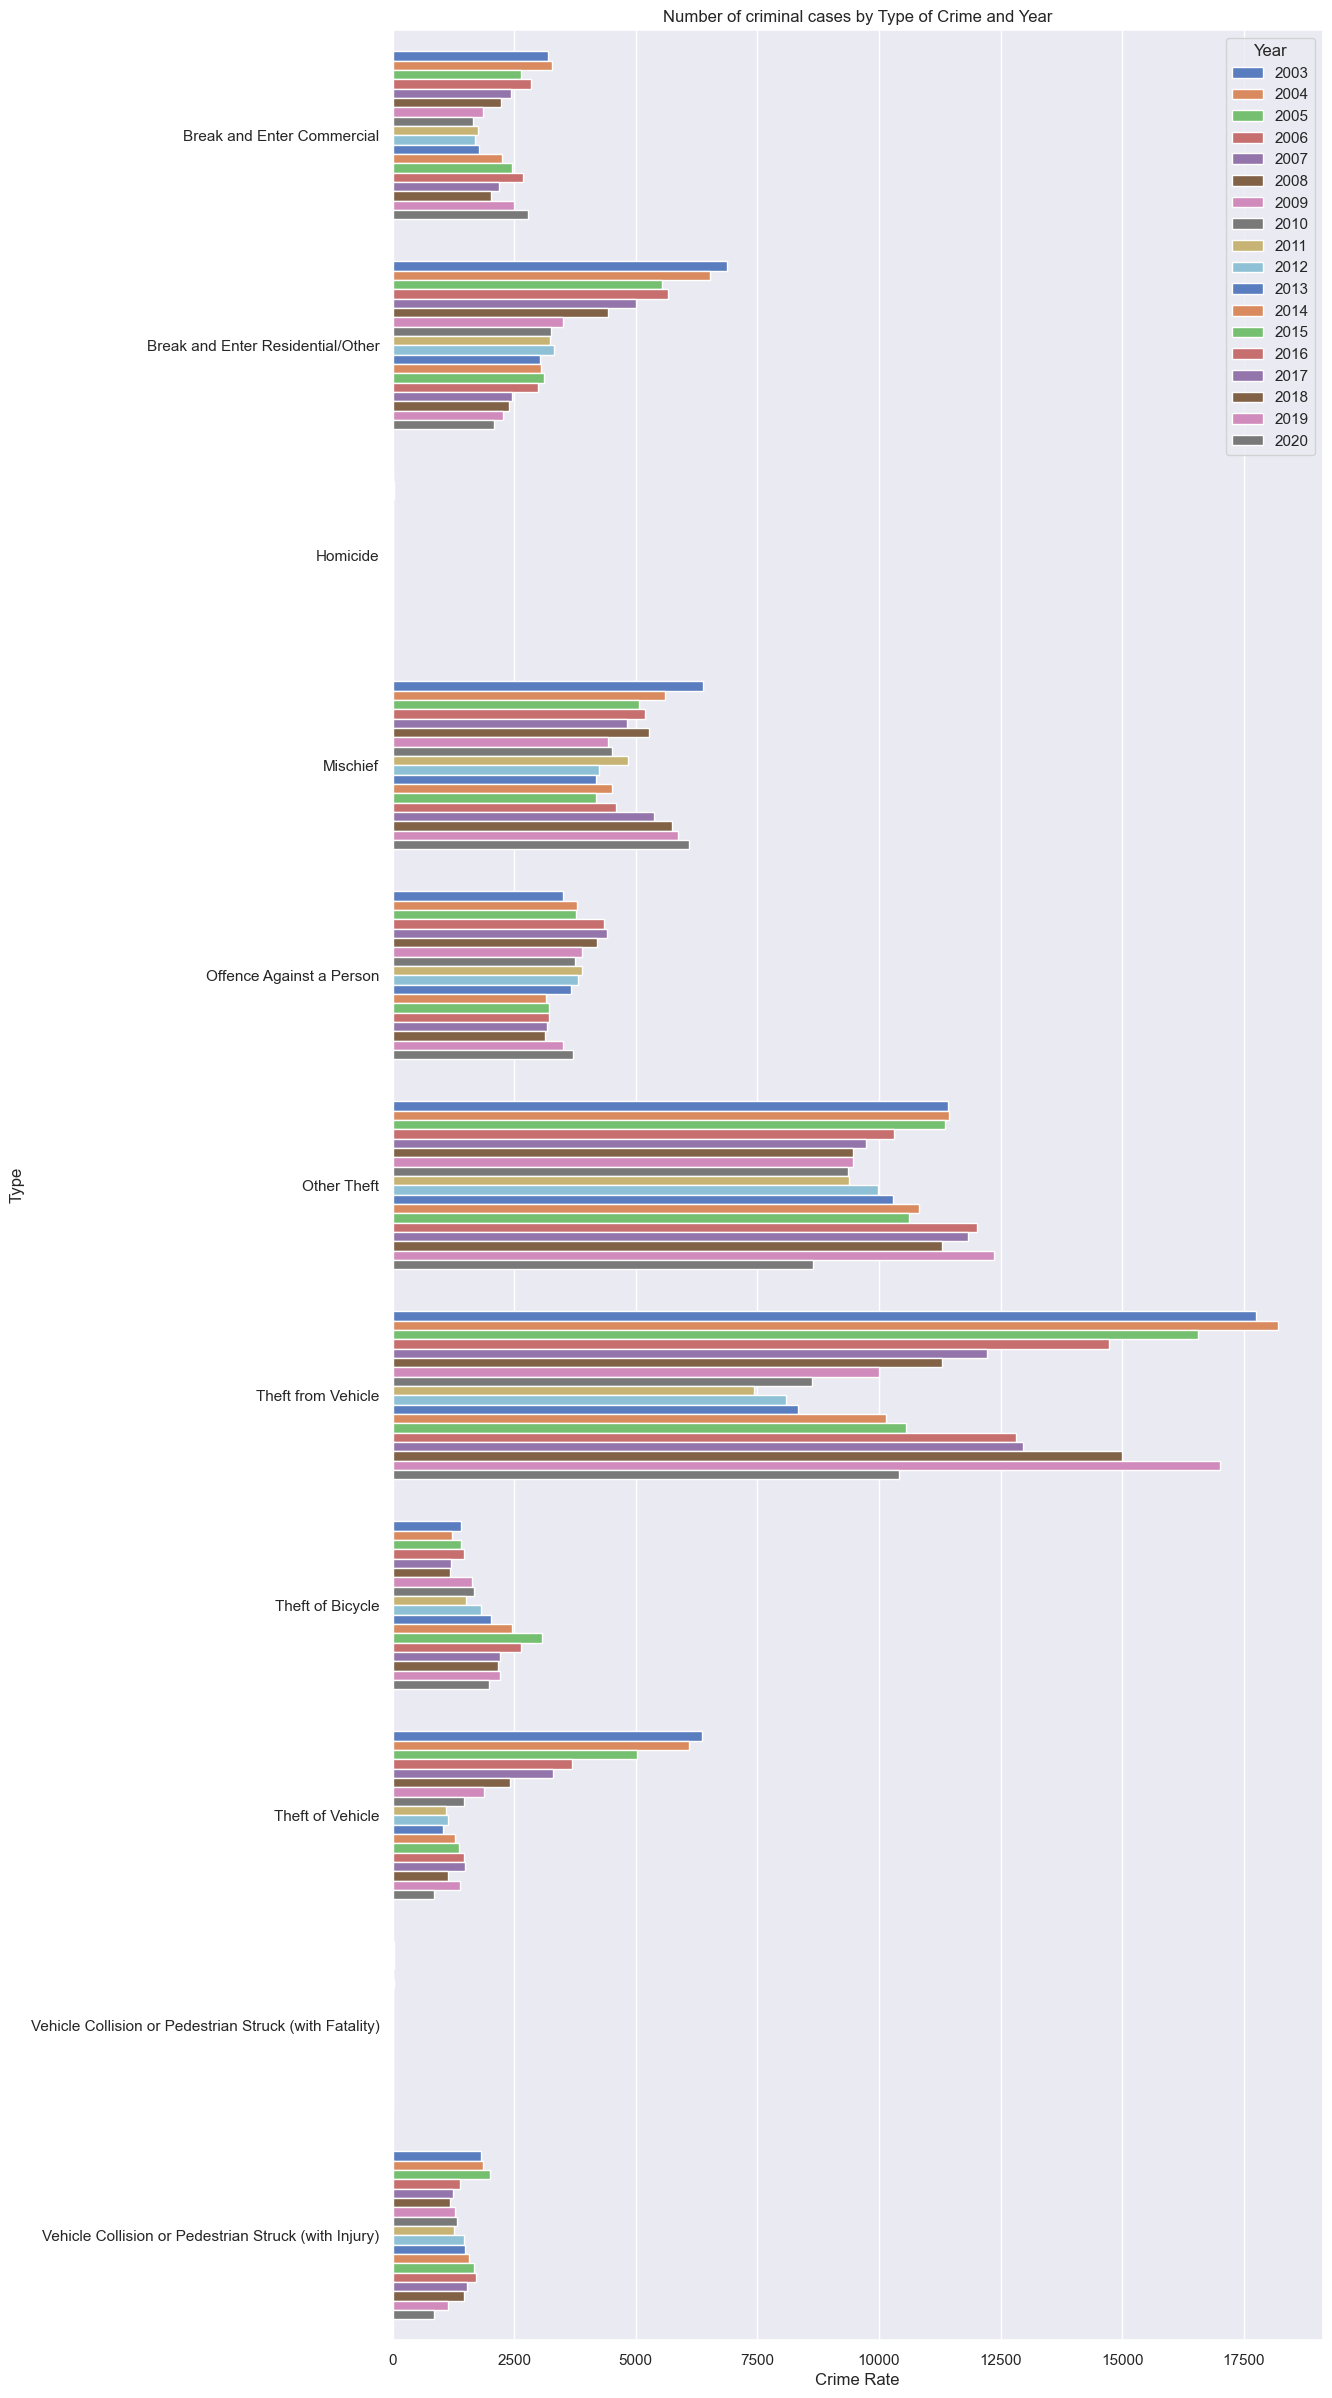

In [23]:
#Create countplot with hue
pf.countplothue(df_cleaned, 'Type', 'Year', 'Number of criminal cases by Type of Crime and Year', 'Crime Rate')

From the graph above, it can be observed that "Theft from Vehicle" and "Other Theft" are the major contributors to the number of crime rates throughout the years. "Break and Enter Residential/Other" and "Theft of Vehicle" criminal records have shown a decreasing trend as the years passed. On the other hand, "Break and Enter Commercial", "Mischief", "Other Theft", and "Theft from Vehicle" showed a parabolic curve where the crime rate starts high, dips down, and rises up again. "Theft of Bicycle" has been gradually increasing since 2003, and "Offence Against a Person" and "Vehicle Collision or Pedestrian Struck (with Injury)" remained consistent throughout the years. From these observations, it is generalized that while home security has improved over the years, vehicle security has not. The crime rates would drastically reduce if vehicle manufacturers find a way to further enhance their security systems or if the general public avoid leaving their vehicle unattended for too long.

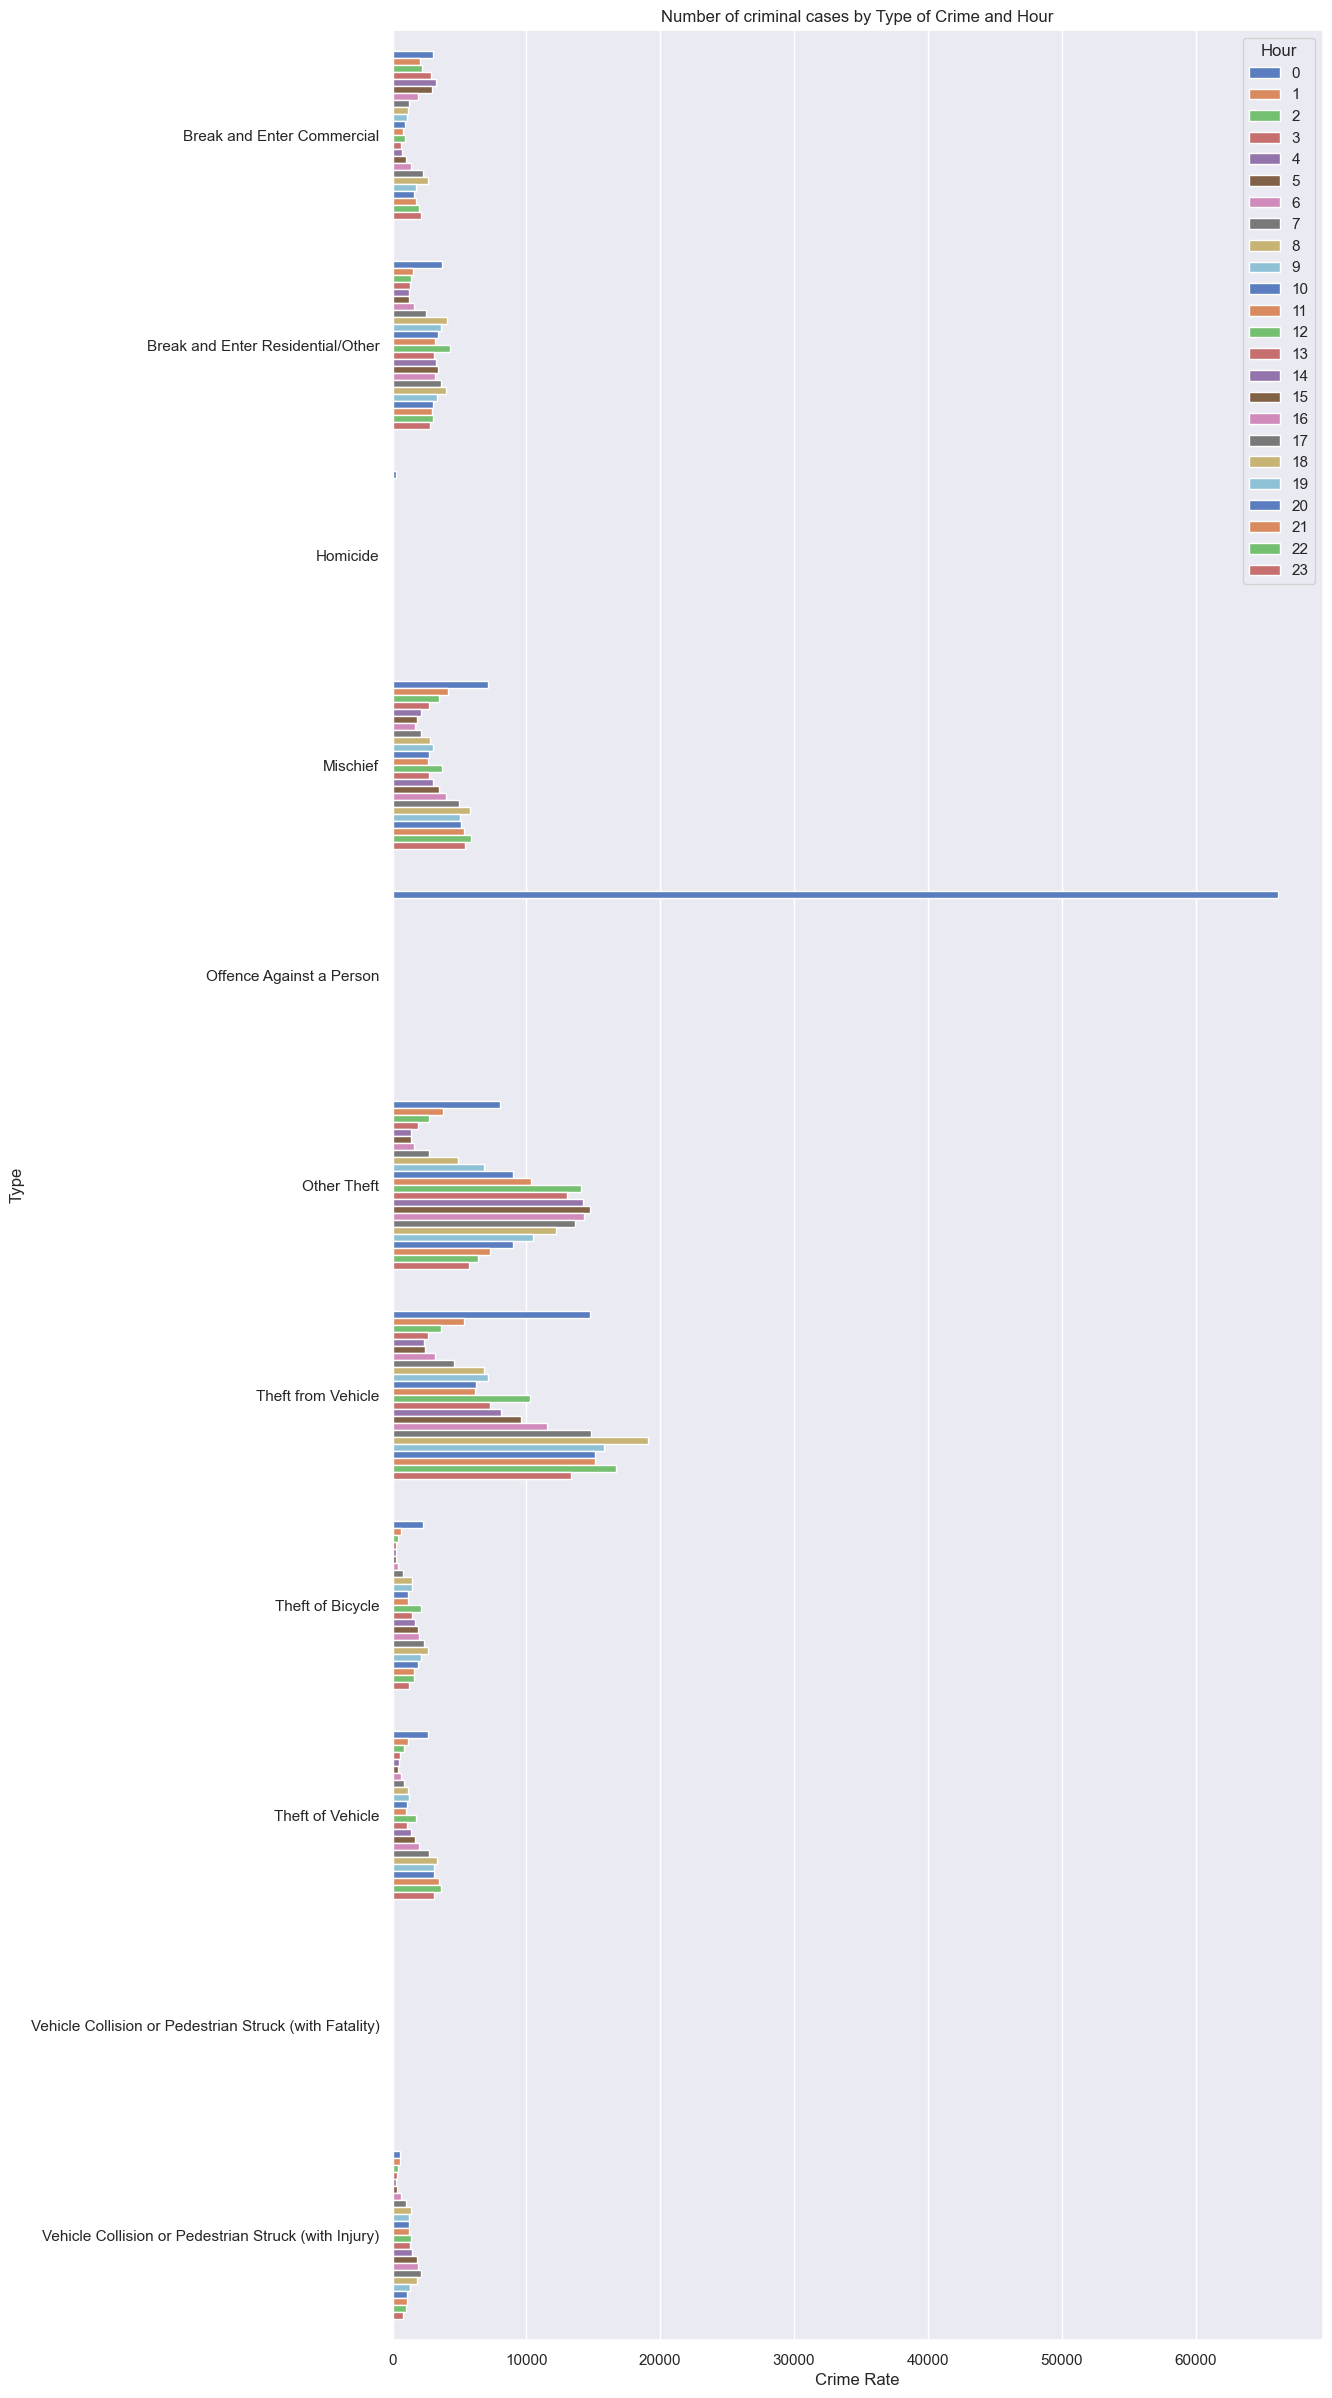

In [24]:
#Create countplot with hue
pf.countplothue(df_cleaned, 'Type', 'Hour', 'Number of criminal cases by Type of Crime and Hour', 'Crime Rate')

There is an overwhelming amount of crime for an "Offence Against a Person" which seems to occur only during midnight. The general public should avoid going outdoors alone at this time to reduce the risks of being a victim for this type of crime. The general trend for each type of crime is that the most occurrence time is during midnight, with a few exceptions. "Theft from Vehicle" and "Other Theft" also have a high occurrence during the afternoon to late evening. It may be an option for the police department to increase patrolling during these hours to reduce the risks of such criminal activities to occur.

### Conclusion

It is observed that the most occurred crime rate year is 2003 and despite showing an improvement on the occurrence the following few years, has begun to rise again from 2011. There is however, a significant drop during 2020 likely due to the upsurge of the epidemic. The most occurred crime rate month is August, but due to the marginal differences throughout the months, it is likely that the month does not play a significant role in the crime rate. Criminal activities are most likely to occur during midnight as from the observations, which are largely classified as "Offense Against a Person", followed by "Theft of Vehicle" and "Other Theft".

From these observations, we can predict that the crime rate will begin to increase again in the following years do to the pandemic settling down, with a fairly constant rate throughout the months. "Theft of Vehicle" and "Other Theft" are still likely to be the main contributors to the amount of crime, mostly occurring during the midnight and late evening. During midnight, "Offense Against a Person" is still likely to be a risk especially.

It is best for the general public to be wary when leaving the house during midnight, especially if alone, as well as leaving their vehicle unattended for a long period of time in an environment with low security. Valuables should be taken out of the car whenever unused, and the windows and doors should be properly locked. The police department should develop a plan for reducing the crime rates especially for thefts as they are the largest contributor, whether that be to increase patrolling or to improve security systems or by other means.